## Customer Segmentation for Marketing Analytics

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

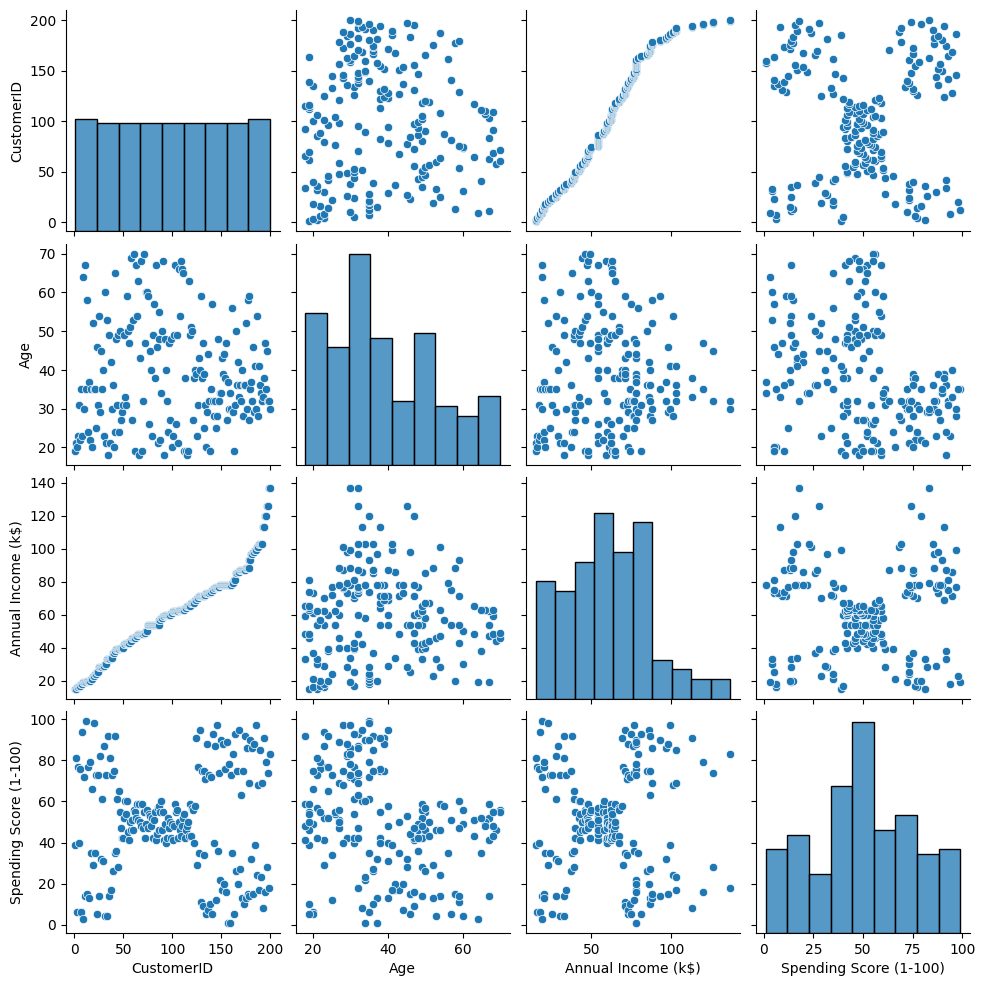

In [6]:
# Pairwise relationship between Variables of the Dataset
sns.pairplot(df)
plt.show()

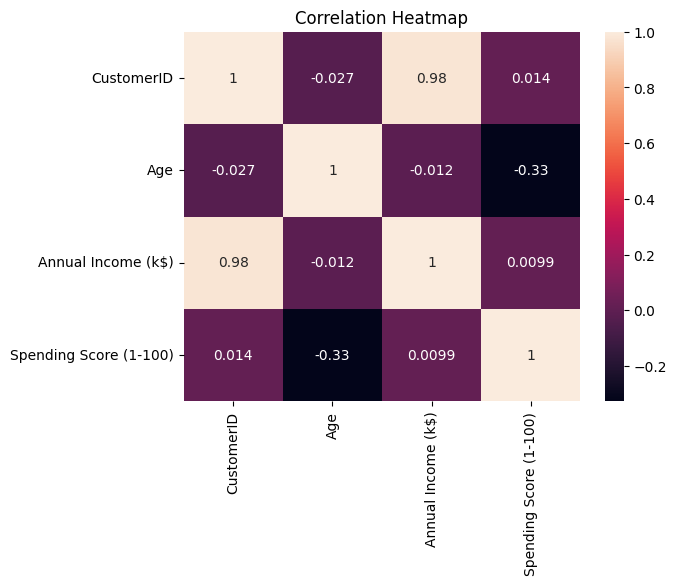

In [7]:
# Correlation
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

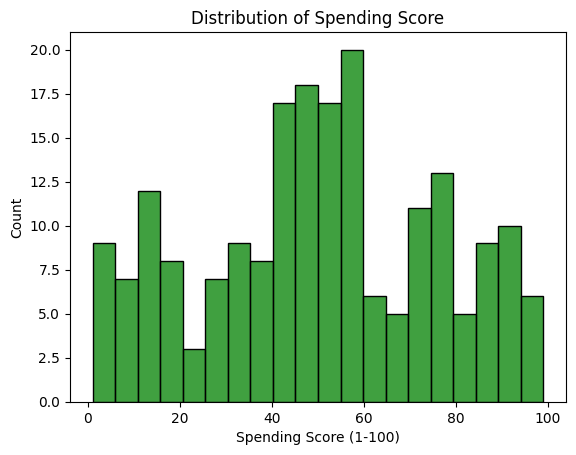

In [8]:
# Analyzing the data with respect to "Spending Score
sns.histplot(df['Spending Score (1-100)'], bins= 20, color='g')
plt.title("Distribution of Spending Score")
plt.show()

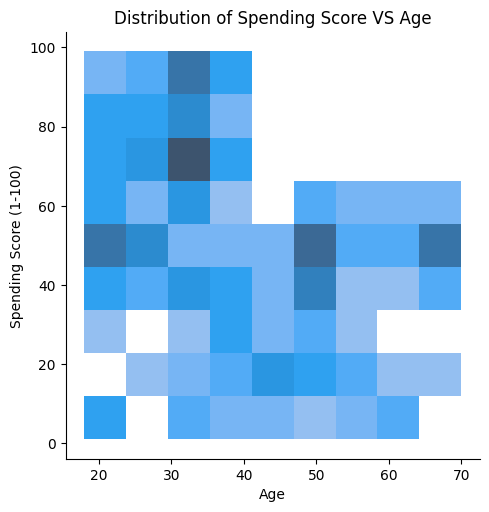

In [9]:
# Distribution of Spending Score with respect to Age
sns.displot(data= df,y='Spending Score (1-100)',x='Age')
plt.title("Distribution of Spending Score VS Age")
plt.show()

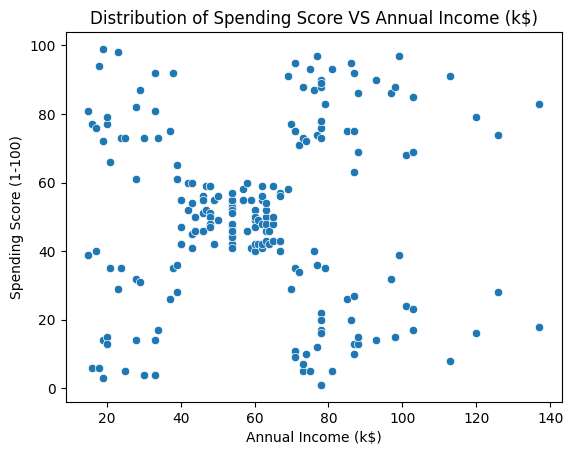

In [10]:
# Distribution of Spending Score with respect to Annual Income
sns.scatterplot(data= df,y='Spending Score (1-100)',x='Annual Income (k$)')
plt.title("Distribution of Spending Score VS Annual Income (k$)")
plt.show()

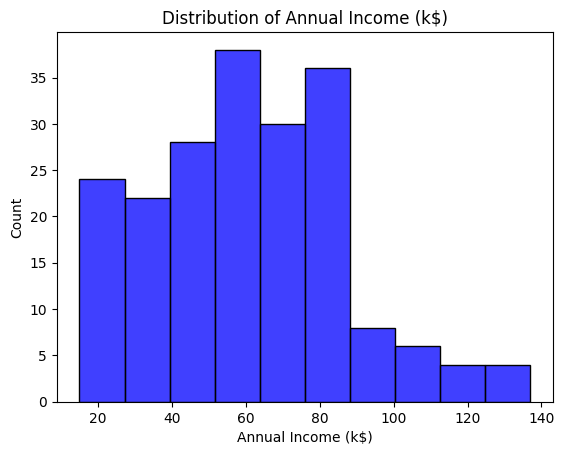

In [11]:
# Distribution of Annual Income
sns.histplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income (k$)")
plt.show()

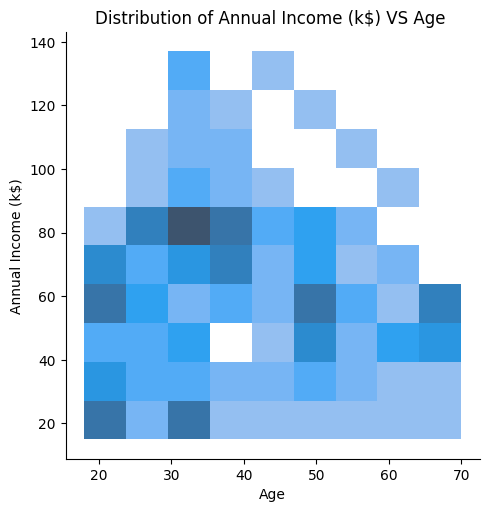

In [12]:
# Distributuion Annual Income with respect to Age
sns.displot(data= df,y='Annual Income (k$)',x='Age')
plt.title("Distribution of Annual Income (k$) VS Age ")
plt.show()

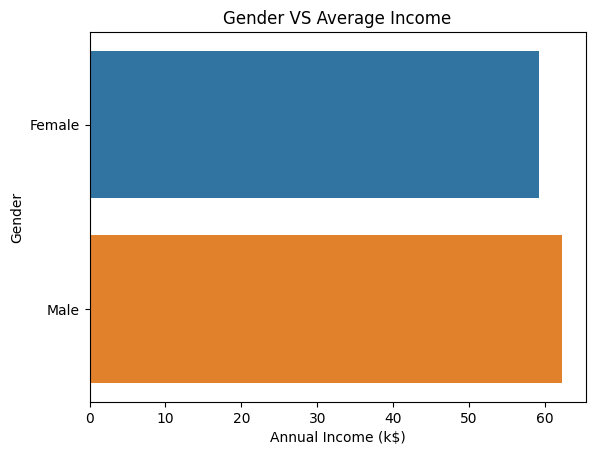

In [13]:
# Average Income distribution by Gender
gender_income = df.groupby('Gender')['Annual Income (k$)'].agg('mean').reset_index()
sns.barplot(data= gender_income, y='Gender', x='Annual Income (k$)')
plt.title("Gender VS Average Income")
plt.show()

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.select_dtypes("object").describe()

,Gender
count,200
unique,2
top,Female
freq,112


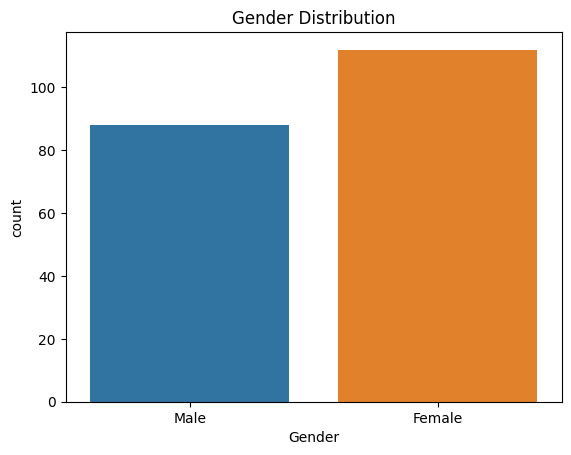

In [16]:
# Gender Distribution
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

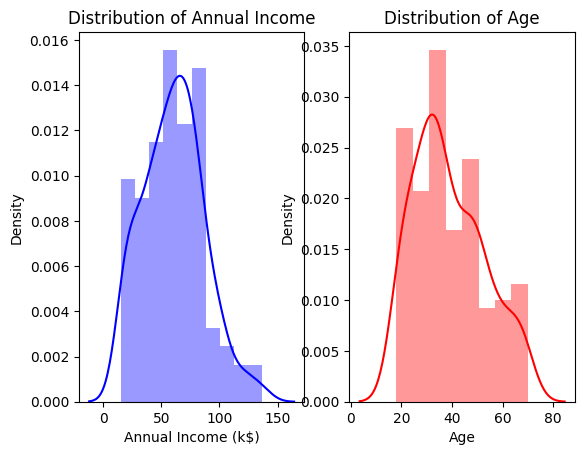

In [17]:
# Distribution of Annual Income & Age
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income")

plt.subplot(1,2,2)
sns.distplot(df['Age'], color='r')
plt.title("Distribution of Age")
plt.show()

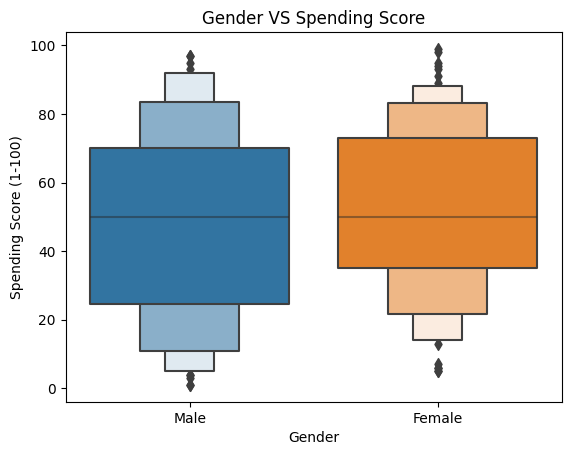

In [18]:
# Gender VS Spending Score
sns.boxenplot(x=df['Gender'], y=df['Spending Score (1-100)'])
plt.title("Gender VS Spending Score")
plt.show()

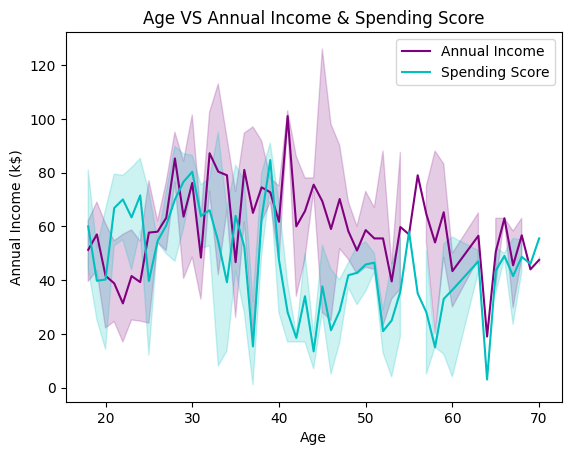

In [19]:
# Age VS Annual Income & Spending Score
x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

sns.lineplot(data=df, x=x, y=y, color='purple', label="Annual Income")
sns.lineplot(data=df, x=x, y=z, color='c', label="Spending Score")
plt.title("Age VS Annual Income & Spending Score")
plt.legend()
plt.show()

## Clustering

In [20]:
# Finding Clusters who relates to similar behaviour according to "Age, Annual Income & Spending Score"
X = df.iloc[:,2:]
X.shape

(200, 3)

### K-Means Clustering

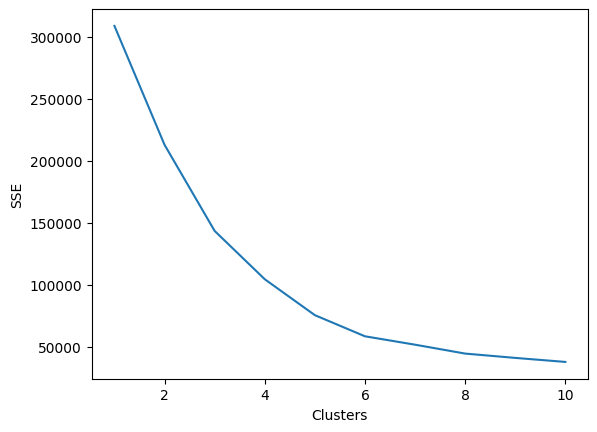

In [21]:
# The Elbow method to find optimal number of Clusters
from sklearn.cluster import KMeans
Inter = []
for i in range(1,11):
  model = KMeans(n_clusters = i)
  model.fit(X)
  Inter.append(model.inertia_)

# plotting the Elbow
plt.plot(np.arange(1,11), Inter)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [22]:
# Fitting the model on optimum Clusters
# From the elbow curve it is clear that the optimum number of clusters i.e., n_clusters is 3.
K_model = KMeans(n_clusters = 3)
K_model.fit(X)
clusters = K_model.labels_

In [23]:
# Assigning the fitted Clusters to the X data to Visualize
X = X.assign(cluster = clusters)
X.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),cluster
166,42,86,20,2
123,39,69,91,0
83,46,54,44,1
35,21,33,81,1
84,21,54,57,1
150,43,78,17,2
88,34,58,60,1
75,26,54,54,1
109,66,63,48,1
70,70,49,55,1


In [24]:
import plotly.express as px
# Visualizing the Clusters
fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))